In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/jan_feb_mar.csv')
df.columns

Index(['Date', 'Hour', 'time', 'Sell_Bid', 'MCV', 'FSV', 'MCP'], dtype='object')

In [ ]:
df.head()
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour      8622 non-null   float64
 1   time      8640 non-null   object 
 2   Sell_Bid  8640 non-null   float64
 3   MCV       8640 non-null   float64
 4   FSV       8640 non-null   float64
 5   MCP       8640 non-null   float64
dtypes: float64(5), object(1)
memory usage: 405.1+ KB


<Axes: >

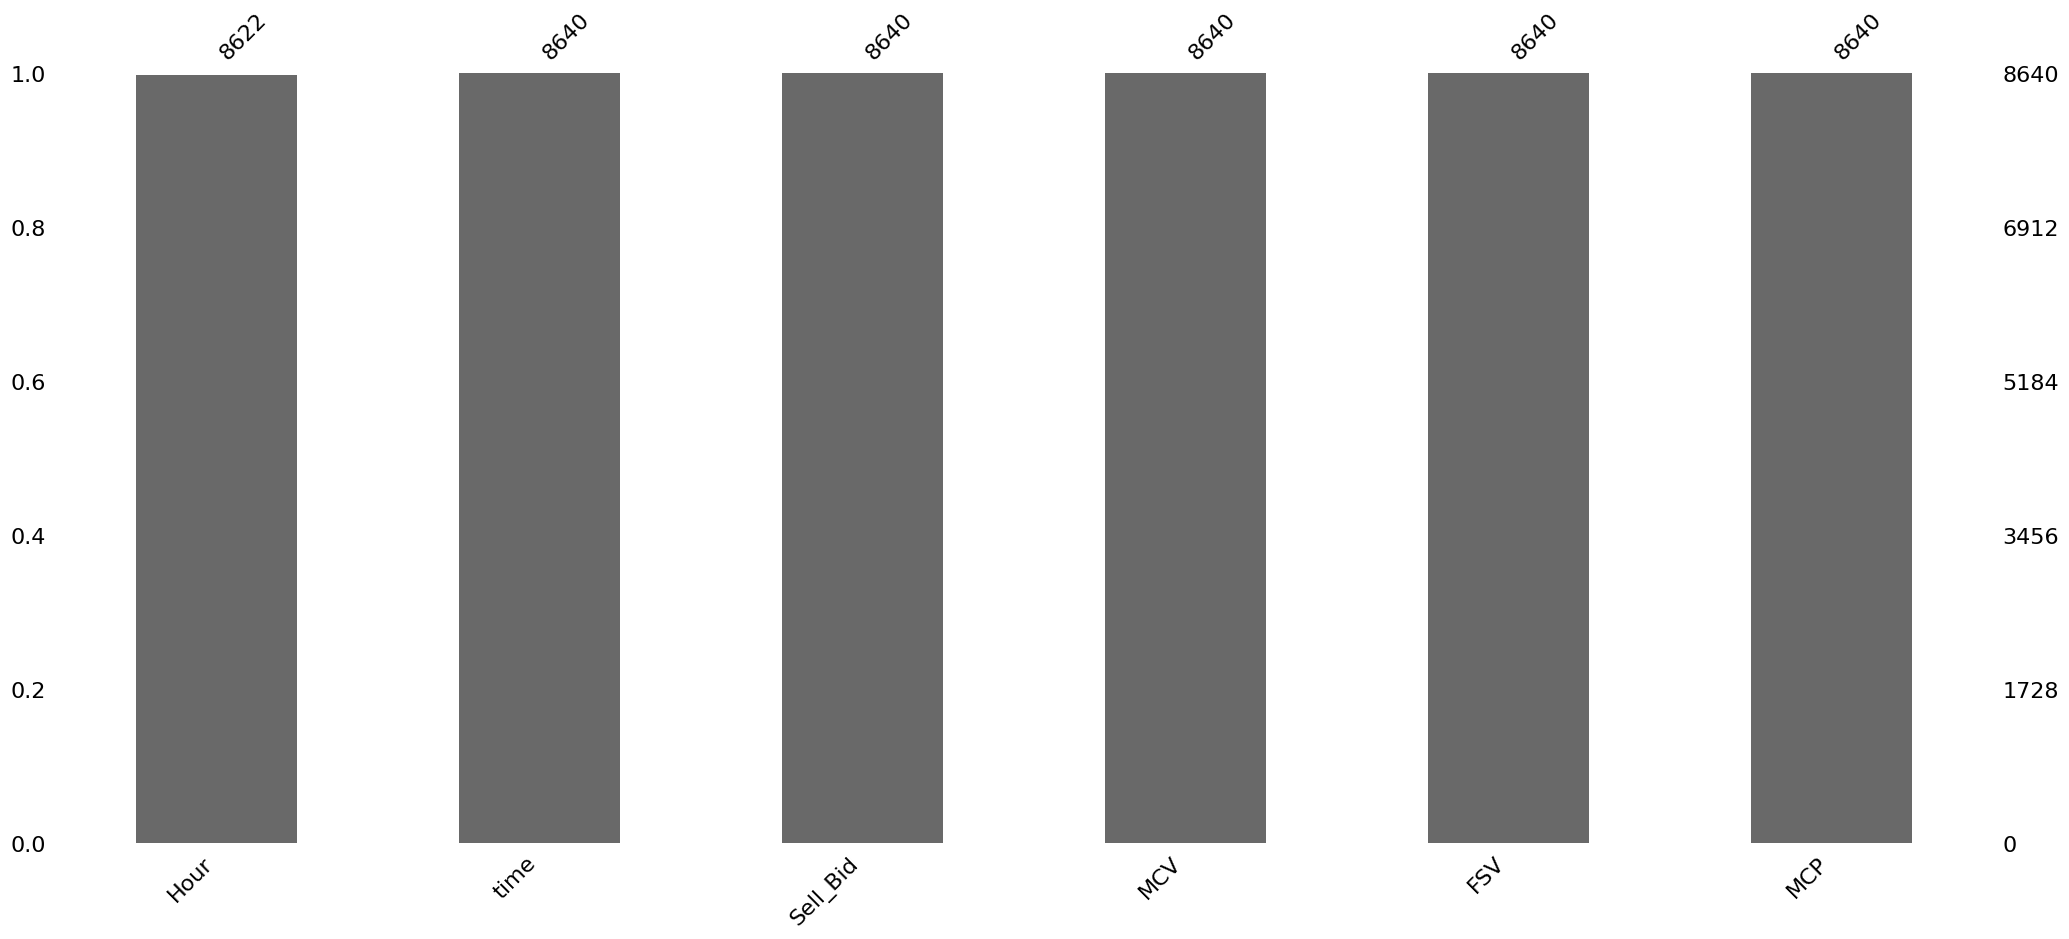

In [ ]:
import missingno as msno
msno.bar(df)


<ipython-input-42-2125f28804a3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

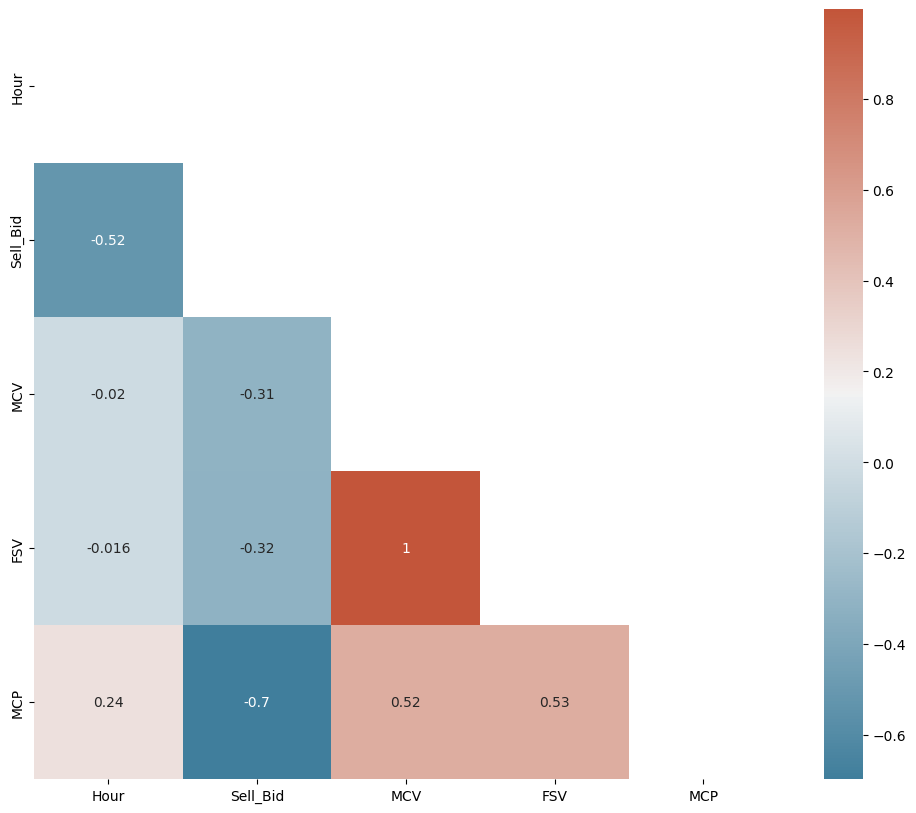

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hour      8622 non-null   float64
 1   time      8622 non-null   object 
 2   Sell_Bid  8622 non-null   float64
 3   MCV       8622 non-null   float64
 4   FSV       8622 non-null   float64
 5   MCP       8622 non-null   float64
dtypes: float64(5), object(1)
memory usage: 471.5+ KB


In [ ]:
df.describe()

,Hour,Sell_Bid,MCV,FSV,MCP
count,8622.000000,8622.000000,8622.000000,8622.000000,8622.000000
mean,12.475992,12503.424890,8005.359231,7994.068667,3552.874230
std,6.924574,3588.188925,1930.615816,1915.034783,1238.735981
min,1.000000,5675.800000,3444.300000,3444.300000,1548.320000
25%,6.000000,9954.125000,6547.050000,6548.075000,2709.585000
50%,12.000000,11794.250000,8038.000000,8042.480000,3299.340000
75%,18.000000,13959.275000,9463.375000,9446.210000,4196.995000
max,24.000000,24936.000000,13471.800000,13462.200000,9868.100000


In [ ]:
df.columns

Index(['Hour', 'time', 'Sell_Bid', 'MCV', 'FSV', 'MCP'], dtype='object')

In [ ]:
from sklearn import preprocessing
df.columns

Index(['Hour', 'time', 'Sell_Bid', 'MCV', 'FSV', 'MCP'], dtype='object')

In [ ]:
x = df[['Hour','Sell_Bid','MCV','FSV']]
x = preprocessing.scale(x)      
y = df['MCP']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVR(kernel='linear')
#clf = svm.SVR(kernel='sigmoid')
#clf = svm.SVR(kernel='rbf')
#clf = svm.SVR(kernel='poly')

In [ ]:
clf.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
Y_pred = clf.score(x_train,y_train)
print(Y_pred)

0.49100511025075333


In [ ]:

for x,y in zip(x_test,y_test):
  print(f"our model : {clf.predict([x])[0]},-------->> Actual:{y}")

our model : 3527.839408082185,-------->> Actual:3363.28
our model : 3477.682648828133,-------->> Actual:4596.55
our model : 3298.688626803007,-------->> Actual:3239.27
our model : 3960.3322206118924,-------->> Actual:4529.65
our model : 4067.5154114311617,-------->> Actual:4000.49
our model : 4068.010100588245,-------->> Actual:4619.69
our model : 3476.054423518085,-------->> Actual:3629.66
our model : 2063.5764985237347,-------->> Actual:2200.9
our model : 3316.8319760409076,-------->> Actual:3112.0
our model : 4004.7665673961565,-------->> Actual:4279.23
our model : 4667.710404330031,-------->> Actual:7750.19
our model : 3027.0870465125613,-------->> Actual:3244.46
our model : 3427.4657228286796,-------->> Actual:3425.72
our model : 2195.479500574932,-------->> Actual:2369.31
our model : 3893.7769165353147,-------->> Actual:4363.72
our model : 2530.668667367797,-------->> Actual:2574.43
our model : 2692.013029719319,-------->> Actual:2579.11
our model : 3187.921650402562,-------->> A

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='fsv', ylabel='mcv'>

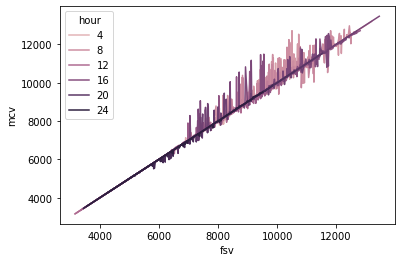

In [ ]:
import seaborn as sns
sns.lineplot(x='fsv',y='mcv',hue='hour',data=df)

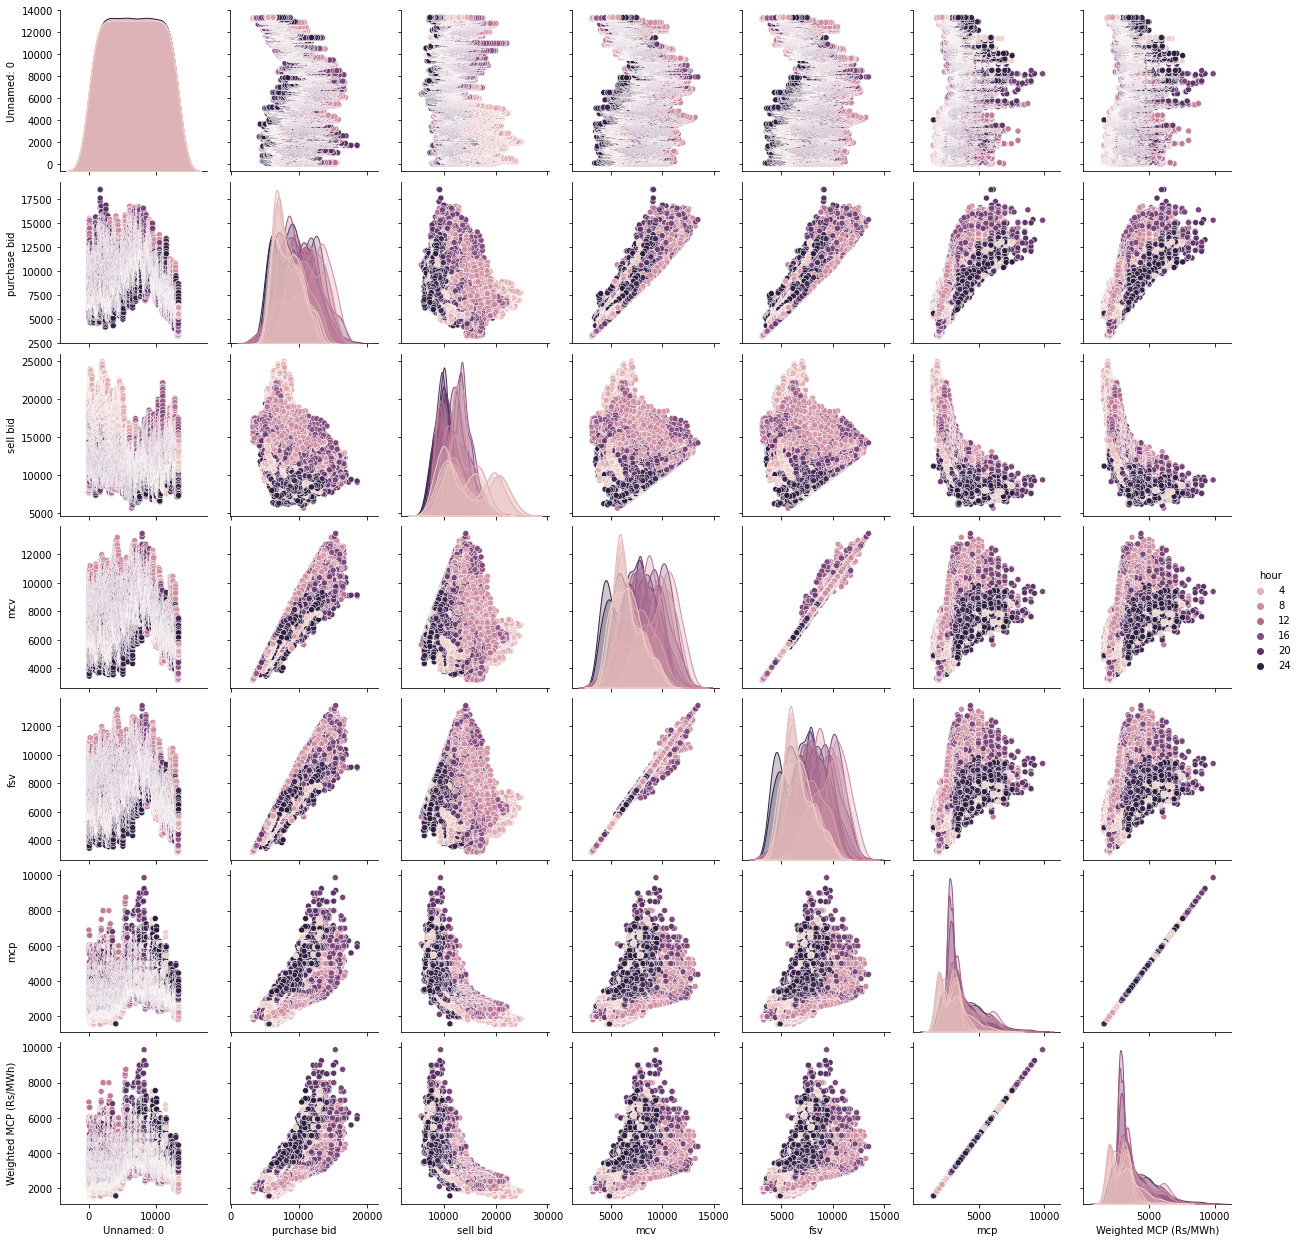

In [ ]:
sns.pairplot(df,hue = 'hour')